### SURF implementation

In [1]:
# necessary imports
import cv2;
import numpy as np;
from matplotlib import pyplot as plt;
from pywt import dwt2, idwt2;
import pywt;

In [2]:
# load image
img = cv2.imread('red_panda.jpg')
cv2.imshow('img', img)

# convert image to grayscale 
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cv2.imshow('gray', gray)

# apply gaussian filter on original
# blur = cv2.GaussianBlur(img, (9,9), 0)
# cv2.imshow('blur', blur)

# apply gaussian filter on grayscale
# blur = cv2.GaussianBlur(gray, (9,9), 0)
# cv2.imshow('blur', blur)

cv2.waitKey(0)
cv2.destroyAllWindows()

## Start new feature detection
using integral images and box filters

In [4]:
# first do a box filter on my image
# SURF calls for sizes 9*9, 15, 21, 27

# cv2.blur uses a normalized box filter

# -1 for depth so it knows that the depth should be the same as the source image
box = cv2.boxFilter(gray, -1, (9,9))
cv2.imshow("boxFilter", box)


# get integral image
integral = cv2.integral(box)
print(integral)

cv2.waitKey(0)
cv2.destroyAllWindows()

[[       0        0        0 ...        0        0        0]
 [       0      178      355 ...    85770    85963    86156]
 [       0      354      707 ...   171482   171868   172254]
 ...
 [       0    37395    74800 ... 17460069 17475616 17491119]
 [       0    37506    75022 ... 17495243 17510802 17526317]
 [       0    37617    75244 ... 17530430 17546001 17561528]]


If you want to detect both edges, better option is to keep the output datatype to some higher forms, like cv2.CV_16S, cv2.CV_64F etc, take its absolute value and then convert back to cv2.CV_8U. Below code demonstrates this procedure for a horizontal Sobel filter and difference in results.

In [ ]:
# using sobel
# sobelx64f = cv2.Sobel(blur,cv2.CV_64F,1,0,ksize=5)
# abs_sobel64f = np.absolute(sobelx64f)
# sobel_8u = np.uint8(abs_sobel64f)
# plt.subplot(1,3,3),plt.imshow(sobel_8u,cmap = 'gray')
# plt.title('Sobel abs(CV_64F)'), plt.xticks([]), plt.yticks([])

src_gray: The input image. <br/>
dst: Destination (output) image <br/>
ddepth: Depth of the destination image. Since our input is CV_8U we define ddepth = CV_16S to avoid overflow <br/>
kernel_size: The kernel size of the Sobel operator to be applied internally. We use 3 in this example.
scale, delta and BORDER_DEFAULT: We leave them as default values.

<br/> Result of run of block below
<br/> Kernel dies with each run
<br/> Still need hessian determinants
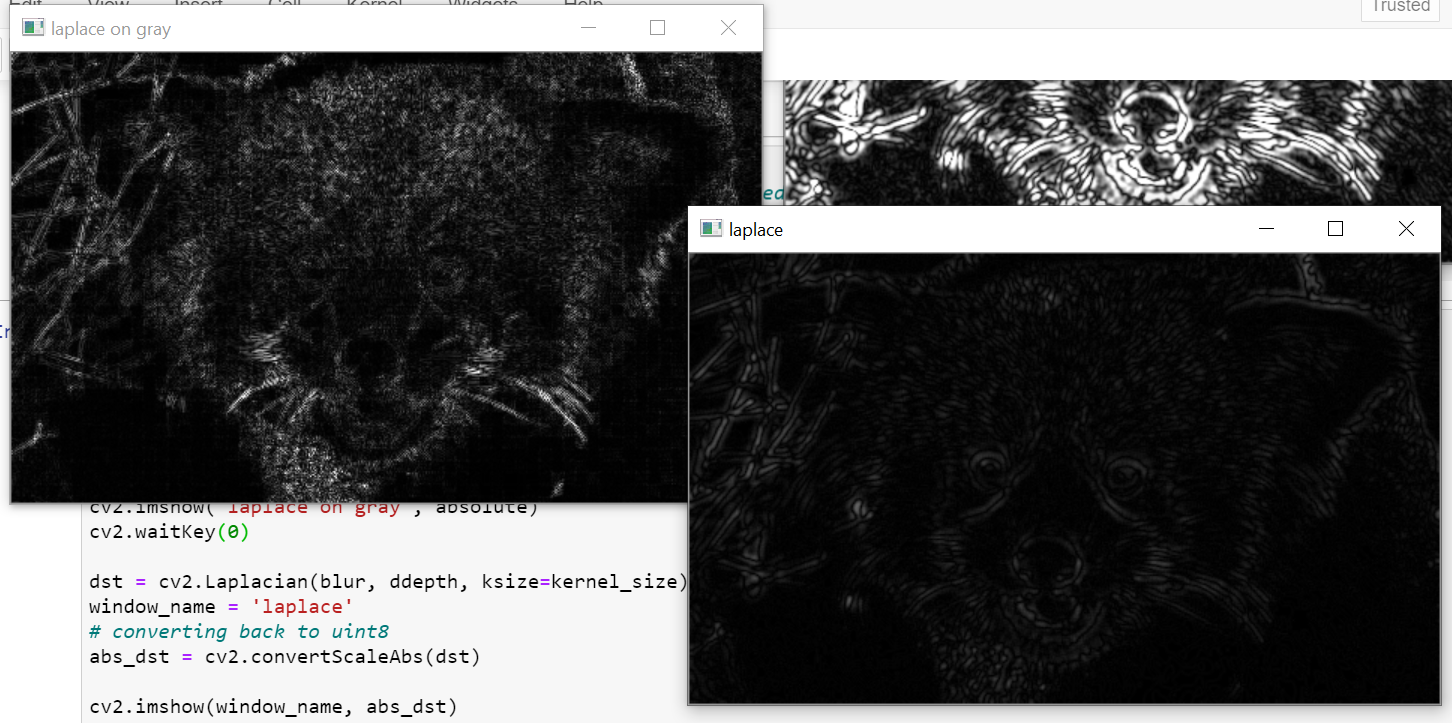

In [ ]:
 # using laplacian
# uses CV_16S to avoid overflow which is why we need to convert it back later on 
# ddepth = cv2.CV_16S;
# kernel_size = 3; # kernel size must be odd

# apply = cv2.Laplacian(gray, ddepth, ksize=1)
# absolute = cv2.convertScaleAbs(apply)
# cv2.imshow('laplace on gray', absolute)
# cv2.imshow('laplace on gray', apply)
# cv2.waitKey(0)

# dst = cv2.Laplacian(blur, ddepth, ksize=kernel_size)
# window_name = 'laplace'
# converting back to uint8
# abs_dst = cv2.convertScaleAbs(dst)

# cv2.imshow(window_name, abs_dst)
# cv2.imshow(window_name, dst)
# cv2.waitKey(0)

In [ ]:
# Section for determinants
# integral = cv2.integral(dst)
# print(integral)
# print(integral.shape)
# (height, width) = integral.shape
# cv2.resize(integral, (30, 30))

# print(width, height)
# det = np.linalg.det(integral) # last two dimensions of array must be square error
# print(det)

## Feature Description Section Below
### Reminder: Need to calculate hessian determinants still
Surf first calculate the Haar-wavelet responses in x and y-direction, and this in a circular neighborhood of radius 6s around the keypoint, with s the scale at which the keypoint was detected. Also, the sampling step is scale dependent and chosen to be s, and the wavelet responses are computed at that current scale s. Accordingly, at high scales the size of the wavelets is big. Therefore integral images are used again for fast filtering. <br/><br/>
Then we calculate the sum of vertical and horizontal wavelet responses in a scanning area, then change the scanning orientation (add π/3), and re-calculate, until we find the orientation with largest sum value, this orientation is the main orientation of feature descriptor.

In [ ]:
# dst looks to be the more promising image so let's take that
# print(dst.shape)

# # N = n*n
# N = dst.shape[0]*dst.shape[1]
# print(N)
# f = cv2.resize()


# trans = pywt.dwt2(dst, 'haar')
# LL, (LH, HL, HH) = trans
# titles = ['Approximation', ' Horizontal detail',
#           'Vertical detail', 'Diagonal detail']
# fig = plt.figure(figsize=(12, 3))
# for i, a in enumerate([LL, LH, HL, HH]):
#     ax = fig.add_subplot(1, 4, i + 1)
#     ax.imshow(a, interpolation="nearest", cmap=plt.cm.gray)
#     ax.set_title(titles[i], fontsize=10)
#     ax.set_xticks([])
#     ax.set_yticks([])

# fig.tight_layout()
# plt.show()

In [ ]:
# old version 


# using integral image
# integral = cv2.integral(blur)
# # int2 = cv2.integral(integral)
# scale = cv2.convertScaleAbs(integral)
# norm = cv2.normalize(integral, None, 255,0, cv2.NORM_MINMAX, cv2.CV_8UC1)

# cv2.imshow('int_scale', scale)
# cv2.imshow('int_norm', norm)
# # cv2.imshow('int_scale2', scale2)
# # cv2.imshow('int_norm2', norm2)

# rows,cols,dims=img.shape  
# ssum = numpy.zeros((rows,cols),numpy.int32)
# imageIntegral = cv2.integral(blur, ssum,-1) 
# normInt = cv2.normalize(imageIntegral, None, 255,0, cv2.NORM_MINMAX, cv2.CV_8UC1)
# cv2.imshow("Integral Image", normInt);   